In [219]:
import networkx as nx
import numpy as np
import pandas as pd
import copy
import random
import math

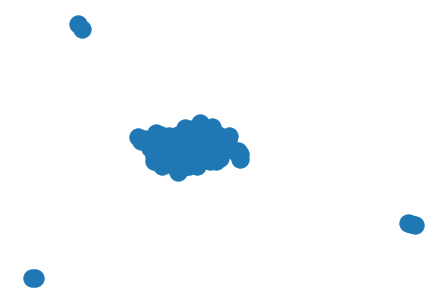

In [310]:
G = nx.read_adjlist("/Users/danielluo/School/Senior Year/Math 168/socfb-Caltech36.mtx.txt")

nx.draw(G)

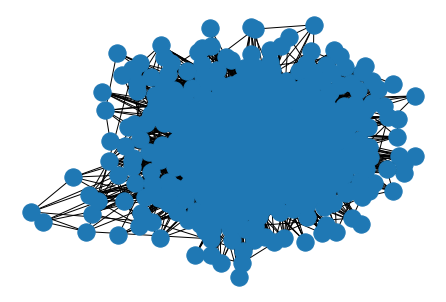

In [12]:
G_5_core = nx.algorithms.core.k_core(G, k=5)

nx.draw(G_5_core)

In [14]:
dict(G_5_core.degree())

{'5': 81,
 '1': 124,
 '31': 96,
 '36': 81,
 '39': 59,
 '43': 69,
 '61': 39,
 '63': 47,
 '90': 200,
 '96': 69,
 '101': 72,
 '114': 86,
 '116': 142,
 '120': 80,
 '132': 117,
 '139': 20,
 '140': 41,
 '142': 95,
 '145': 113,
 '146': 84,
 '151': 126,
 '153': 40,
 '154': 77,
 '155': 84,
 '165': 80,
 '176': 53,
 '187': 39,
 '188': 117,
 '190': 81,
 '196': 76,
 '197': 61,
 '198': 51,
 '205': 58,
 '214': 45,
 '223': 190,
 '224': 39,
 '234': 30,
 '236': 60,
 '243': 62,
 '249': 85,
 '252': 104,
 '255': 106,
 '257': 172,
 '261': 56,
 '266': 56,
 '268': 61,
 '270': 54,
 '279': 120,
 '284': 23,
 '296': 77,
 '298': 50,
 '305': 52,
 '309': 41,
 '312': 57,
 '315': 45,
 '321': 79,
 '330': 152,
 '335': 80,
 '336': 22,
 '341': 70,
 '344': 37,
 '352': 59,
 '353': 35,
 '361': 98,
 '365': 36,
 '373': 141,
 '375': 99,
 '377': 144,
 '381': 67,
 '413': 74,
 '415': 104,
 '424': 138,
 '431': 74,
 '436': 92,
 '455': 105,
 '463': 110,
 '475': 20,
 '477': 95,
 '479': 44,
 '481': 135,
 '483': 85,
 '484': 115,
 '487':

Cool so this is how the current k core algorithm works very nice.

## Saving Nodes and Edges

Let's trace the below code and see how it works

In [16]:
def core_number(G):
    """Returns the core number for each vertex.

    A k-core is a maximal subgraph that contains nodes of degree k or more.

    The core number of a node is the largest value k of a k-core containing
    that node.

    Parameters
    ----------
    G : NetworkX graph
       A graph or directed graph

    Returns
    -------
    core_number : dictionary
       A dictionary keyed by node to the core number.

    Raises
    ------
    NetworkXError
        The k-core is not implemented for graphs with self loops
        or parallel edges.

    Notes
    -----
    Not implemented for graphs with parallel edges or self loops.

    For directed graphs the node degree is defined to be the
    in-degree + out-degree.

    References
    ----------
    .. [1] An O(m) Algorithm for Cores Decomposition of Networks
       Vladimir Batagelj and Matjaz Zaversnik, 2003.
       https://arxiv.org/abs/cs.DS/0310049
    """
    
    # this code will not run if there are self edges
    if nx.number_of_selfloops(G) > 0:
        msg = (
            "Input graph has self loops which is not permitted; "
            "Consider using G.remove_edges_from(nx.selfloop_edges(G))."
        )
        raise NetworkXError(msg)
        
    
    degrees = dict(G.degree())# This is a dict of 'node num':degree
    # Sort nodes by degree.
    # this a list of the number of the node ranked from degree low to high
    nodes = sorted(degrees, key=degrees.get)
    bin_boundaries = [0]
    curr_degree = 0
    for i, v in enumerate(nodes): # enumerate gives them each an index so i is the index and v is the node
        if degrees[v] > curr_degree:
            bin_boundaries.extend([i] * (degrees[v] - curr_degree)) # everytime it gets bigger multiply the index by the amount increase
            curr_degree = degrees[v] # eventually becomes the max degree but increases everytime the degree increases
    node_pos = {v: pos for pos, v in enumerate(nodes)} # creates a dict 'node_num':position in list
    
    # The initial guess for the core number of a node is its degree.
    core = degrees
    nbrs = {v: list(nx.all_neighbors(G, v)) for v in G} # creates a dict that's node_num and a list of the node num of neighbors
    for v in nodes: # for each node v in nodes that sorted low to high by degree
        for u in nbrs[v]: # for each of v's neighbors called u
            if core[u] > core[v]: # if it's neighbor (u) has a greater degree than the current node(v)
                nbrs[u].remove(v) # remove v as a neighbor of u
                pos = node_pos[u] # set position to the position of u
                bin_start = bin_boundaries[core[u]] # bin boundary at the degree of node u
                node_pos[u] = bin_start
                node_pos[nodes[bin_start]] = pos
                nodes[bin_start], nodes[pos] = nodes[pos], nodes[bin_start]
                bin_boundaries[core[u]] += 1
                core[u] -= 1
    return core

In [17]:
core_number(G)

{'5': 35,
 '1': 35,
 '31': 35,
 '36': 35,
 '39': 35,
 '43': 35,
 '61': 34,
 '63': 32,
 '90': 35,
 '96': 35,
 '101': 35,
 '114': 35,
 '116': 35,
 '120': 35,
 '132': 35,
 '139': 20,
 '140': 35,
 '142': 35,
 '145': 35,
 '146': 35,
 '151': 35,
 '153': 35,
 '154': 35,
 '155': 35,
 '165': 35,
 '176': 34,
 '187': 30,
 '188': 35,
 '190': 35,
 '196': 35,
 '197': 35,
 '198': 35,
 '205': 35,
 '214': 32,
 '223': 35,
 '224': 31,
 '234': 28,
 '236': 35,
 '243': 35,
 '249': 35,
 '252': 35,
 '255': 35,
 '257': 35,
 '261': 35,
 '266': 35,
 '268': 35,
 '270': 35,
 '279': 35,
 '284': 23,
 '296': 35,
 '298': 35,
 '305': 35,
 '309': 32,
 '312': 35,
 '315': 33,
 '321': 35,
 '330': 35,
 '335': 35,
 '336': 19,
 '341': 35,
 '344': 31,
 '352': 35,
 '353': 31,
 '361': 35,
 '365': 27,
 '373': 35,
 '375': 35,
 '377': 35,
 '381': 35,
 '413': 35,
 '415': 35,
 '424': 35,
 '431': 35,
 '436': 35,
 '455': 35,
 '463': 35,
 '475': 20,
 '477': 35,
 '479': 34,
 '481': 35,
 '483': 35,
 '484': 35,
 '487': 35,
 '490': 35,
 '49

In [50]:
degrees = dict(G.degree())
nodes = sorted(degrees, key=degrees.get)
bin_boundaries = [0]
curr_degree = 0
for i, v in enumerate(nodes): # enumerate gives them each an index so i is the index and v is the node
    if degrees[v] > curr_degree:
        bin_boundaries.extend([i] * (degrees[v] - curr_degree))
        curr_degree = degrees[v]

{'318': 0,
 '34': 1,
 '147': 2,
 '35': 3,
 '583': 4,
 '184': 5,
 '75': 6,
 '704': 7,
 '99': 8,
 '100': 9,
 '111': 10,
 '123': 11,
 '221': 12,
 '297': 13,
 '507': 14,
 '163': 15,
 '360': 16,
 '437': 17,
 '169': 18,
 '182': 19,
 '207': 20,
 '372': 21,
 '708': 22,
 '264': 23,
 '272': 24,
 '306': 25,
 '317': 26,
 '401': 27,
 '394': 28,
 '744': 29,
 '531': 30,
 '581': 31,
 '533': 32,
 '536': 33,
 '713': 34,
 '11': 35,
 '74': 36,
 '13': 37,
 '106': 38,
 '262': 39,
 '204': 40,
 '19': 41,
 '751': 42,
 '40': 43,
 '474': 44,
 '527': 45,
 '629': 46,
 '92': 47,
 '94': 48,
 '426': 49,
 '269': 50,
 '410': 51,
 '159': 52,
 '662': 53,
 '206': 54,
 '501': 55,
 '398': 56,
 '363': 57,
 '566': 58,
 '693': 59,
 '428': 60,
 '300': 61,
 '505': 62,
 '456': 63,
 '743': 64,
 '633': 65,
 '540': 66,
 '9': 67,
 '37': 68,
 '24': 69,
 '403': 70,
 '68': 71,
 '121': 72,
 '402': 73,
 '684': 74,
 '542': 75,
 '172': 76,
 '181': 77,
 '326': 78,
 '324': 79,
 '597': 80,
 '712': 81,
 '7': 82,
 '237': 83,
 '193': 84,
 '504': 

They use the degree as the max of the biggest k it can belong to

I think using the above code is not the move. Its not simple to adjust for our use case. I'll instead code one myself that will be probably quite slow but that's okay.

In [314]:
Q = nx.Graph()
Q.add_node(1)
Q.add_node(2)
Q.add_node(3)

Q.add_edge(1,2)
Q.add_edge(1,3)
Q.edges(2)

EdgeDataView([(2, 1)])

In [317]:

set([t[::-1] for t in list(Q.edges([2, 3]))])

{(1, 2), (1, 3)}

## Individual Implementation of Normal K Core

In [103]:
def original_k_core(G, k):
    k_core_subgraph = copy.deepcopy(G)
    
    # This goes through and just removes a node if its degree is less than k
    while not all(val >= k for val in dict(k_core_subgraph.degree()).values()):
        for node_num, degree in dict(k_core_subgraph.degree()).items():
            if degree < k:
                k_core_subgraph.remove_node(node_num)
            
    return k_core_subgraph

## Implementation of Modified K Core by Saving an Edge Each time

In [110]:
def modified_k_core_save_an_edge(G, k):
    k_core_subgraph = copy.deepcopy(G)
    
    # This goes through and just removes a node if its degree is less than k
    while not all(val >= k for val in dict(k_core_subgraph.degree()).values()):
        potential_weighted_deletions = []
        for node_num, degree in dict(k_core_subgraph.degree()).items():
            if degree < k:
                # add nodes to list based on their degree
                potential_weighted_deletions += [node_num] * degree
        nodes_to_delete = set(potential_weighted_deletions)
        # randomly choose a node that we're gonna delete
        saved_node = random.choice(potential_weighted_deletions)
        # find all their neighbors and choose the ones that aren't about to be deleted (in the crust)
        saved_node_neighbors = set([n for n in k_core_subgraph.neighbors(saved_node)])
        neighbor_candidates_to_save = saved_node_neighbors.difference(nodes_to_delete)
        # turn it into a set to remove duplicates and remove ALL the nodes
        k_core_subgraph.remove_nodes_from(nodes_to_delete)
        if len(neighbor_candidates_to_save) > 1: # if there are any viable candidates
            selected_saved_node_neighbor = random.choice(list(neighbor_candidates_to_save))
            # put the node back into the graph
            k_core_subgraph.add_node(saved_node)
            k_core_subgraph.add_edge(saved_node, selected_saved_node_neighbor)
    return k_core_subgraph

In [377]:
def modified_k_core_save_an_edge_p(G, k, p):
    k_core_subgraph = copy.deepcopy(G)
    
    # This goes through and just removes a node if its degree is less than k
    while not all(val >= k for val in dict(k_core_subgraph.degree()).values()):
        potential_weighted_deletions = []
        for node_num, degree in dict(k_core_subgraph.degree()).items():
            if degree < k:
                # add nodes to list based on their degree
                potential_weighted_deletions += [node_num] * degree
        crust = set(potential_weighted_deletions)
        core = set(k_core_subgraph.nodes).difference(crust)
        crust_edges_reversed = set([t[::-1] for t in list(k_core_subgraph.edges(crust))])
        possible_edges_to_save = crust_edges_reversed.intersection(set(k_core_subgraph.edges(core)))
        saved_edges = random.sample(possible_edges_to_save, math.floor(len(possible_edges_to_save) * p))
        saved_nodes = set([node[1] for node in saved_edges])
        print("crust")
        print(crust)
        print("possible edges to save")
        print(possible_edges_to_save)
        print("saved edges")
        print(saved_edges)
        print("saved nodes")
        print(saved_nodes)
        
        # turn it into a set to remove duplicates and remove ALL the nodes
        k_core_subgraph.remove_nodes_from(crust)
        if len(saved_nodes) > 1: # if there are any viable candidates
            print("saving")
            k_core_subgraph.add_nodes_from(saved_nodes)
            k_core_subgraph.add_edges_from(saved_edges)
    return k_core_subgraph

In [380]:
modified_k_core_save_an_edge_p(G, 35, 0.1)

crust
{'509', '725', '757', '439', '727', '207', '588', '405', '637', '41', '219', '449', '238', '227', '584', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '603', '348', '240', '124', '98', '201', '569', '49', '269', '712', '128', '13', '758', '437', '250', '3', '451', '643', '618', '706', '617', '593', '346', '112', '264', '435', '33', '34', '363', '639', '753', '419', '411', '414', '513', '40', '653', '710', '708', '347', '551', '496', '105', '215', '84', '121', '324', '553', '701', '611', '693', '677', '303', '407', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '212', '271', '119', '397', '237', '297', '260', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '755', '548', '692', '739', '337', '28', '658', '506', '164', '703', '485', '466', '612', '743', '644

In [366]:
G.edges('181')

EdgeDataView([('181', '252'), ('181', '662'), ('181', '733')])

In [359]:
def create_output_needed_p(modified_k_core, G, p):
    # initialize the max core
    max_cores = dict((node,0) for node in G.nodes())
    max_degree = max(dict(G.degree).values())
    
    for degree_num in range(1,max_degree):
        result = modified_k_core_save_an_edge_p(G, degree_num, p)
        if result: # if this is not empty
            for node in max_cores.keys(): # it should be updated 
                if max_cores[node] < degree_num and (node in dict(result.degree).keys()):
                    max_cores[node] = degree_num
        else:
            return max_cores

In [381]:
my_dict = create_output_needed_p(modified_k_core_save_an_edge_p, G, 0.5)

crust
{'147', '317', '221', '708', '437', '169', '306', '207', '372', '744', '531', '35', '111', '507', '264', '297', '536', '360', '100', '75', '394', '533', '713', '34', '99', '123', '272', '184', '318', '182', '583', '401', '581', '163', '704'}
possible edges to save
{('724', '111'), ('57', '184'), ('477', '34'), ('50', '583'), ('625', '123'), ('90', '704'), ('411', '744'), ('193', '182'), ('161', '507'), ('585', '99'), ('129', '297'), ('444', '581'), ('594', '272'), ('166', '360'), ('752', '306'), ('370', '401'), ('355', '163'), ('18', '318'), ('433', '531'), ('567', '713'), ('223', '372'), ('387', '264'), ('522', '394'), ('171', '75'), ('128', '221'), ('550', '533'), ('278', '207'), ('735', '536'), ('429', '100'), ('440', '317'), ('259', '708')}
saved edges
[('355', '163'), ('735', '536'), ('522', '394'), ('411', '744'), ('57', '184'), ('567', '713'), ('440', '317'), ('166', '360'), ('128', '221'), ('90', '704'), ('387', '264'), ('550', '533'), ('259', '708'), ('193', '182'), ('59

crust
{'147', '629', '684', '9', '306', '207', '540', '608', '680', '326', '237', '297', '172', '536', '583', '401', '704', '456', '221', '206', '169', '109', '575', '744', '627', '398', '531', '507', '474', '262', '98', '394', '597', '533', '713', '566', '11', '318', '193', '163', '337', '317', '269', '712', '7', '13', '68', '437', '743', '372', '402', '428', '94', '111', '633', '264', '34', '542', '99', '363', '106', '504', '662', '40', '410', '204', '708', '37', '505', '24', '527', '92', '121', '324', '35', '340', '403', '181', '693', '360', '74', '426', '300', '123', '501', '184', '272', '19', '182', '75', '581', '100', '159', '751'}
possible edges to save
{('389', '68'), ('252', '181'), ('342', '11'), ('453', '40'), ('50', '583'), ('430', '597'), ('152', '575'), ('411', '269'), ('14', '262'), ('735', '505'), ('444', '575'), ('80', '474'), ('421', '340'), ('710', '402'), ('387', '402'), ('626', '627'), ('288', '121'), ('367', '204'), ('370', '401'), ('642', '410'), ('625', '9'), ('

crust
{'147', '725', '629', '684', '9', '306', '207', '540', '608', '680', '326', '237', '297', '172', '536', '741', '579', '583', '401', '704', '456', '221', '206', '169', '67', '109', '575', '744', '627', '398', '531', '507', '474', '350', '262', '98', '394', '597', '533', '713', '566', '11', '318', '193', '163', '337', '134', '317', '269', '712', '7', '703', '13', '68', '437', '749', '743', '372', '402', '428', '94', '111', '633', '264', '34', '542', '99', '363', '106', '504', '662', '40', '410', '204', '708', '37', '505', '24', '527', '92', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '426', '300', '123', '501', '184', '272', '523', '19', '182', '75', '581', '100', '159', '751'}
possible edges to save
{('389', '68'), ('113', '553'), ('373', '703'), ('467', '553'), ('342', '11'), ('453', '40'), ('252', '181'), ('50', '583'), ('430', '597'), ('152', '575'), ('411', '269'), ('697', '749'), ('14', '262'), ('480', '350'), ('735', '505'), ('522', '523'), ('444', '5

crust
{'147', '725', '629', '684', '9', '306', '207', '540', '370', '608', '680', '326', '237', '297', '172', '536', '741', '327', '545', '579', '583', '401', '704', '456', '221', '206', '169', '67', '109', '575', '744', '627', '398', '531', '507', '474', '350', '262', '98', '394', '597', '533', '713', '566', '11', '318', '193', '163', '134', '337', '317', '269', '712', '7', '703', '13', '68', '437', '749', '743', '372', '402', '428', '94', '111', '633', '264', '34', '542', '99', '363', '106', '504', '662', '513', '471', '40', '410', '204', '708', '37', '505', '24', '551', '527', '92', '329', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '734', '426', '300', '123', '501', '184', '272', '523', '19', '182', '75', '581', '100', '159', '751'}
possible edges to save
{('389', '68'), ('522', '370'), ('113', '553'), ('373', '703'), ('467', '553'), ('342', '11'), ('453', '40'), ('252', '181'), ('50', '583'), ('430', '597'), ('152', '575'), ('411', '269'), ('697', '749'), (

crust
{'147', '725', '629', '684', '349', '9', '306', '207', '382', '540', '370', '254', '608', '680', '326', '237', '297', '172', '536', '741', '327', '545', '579', '583', '401', '704', '456', '221', '206', '169', '67', '109', '575', '744', '627', '398', '531', '108', '507', '474', '350', '262', '98', '394', '597', '533', '713', '566', '547', '11', '318', '193', '163', '134', '337', '317', '269', '712', '7', '703', '13', '68', '437', '749', '3', '743', '372', '661', '402', '428', '94', '111', '673', '633', '264', '34', '542', '99', '363', '106', '504', '662', '513', '471', '40', '410', '204', '708', '37', '505', '24', '347', '551', '73', '527', '92', '329', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '734', '426', '300', '123', '501', '184', '272', '523', '19', '182', '75', '581', '100', '159', '751'}
possible edges to save
{('389', '68'), ('522', '370'), ('247', '673'), ('520', '3'), ('113', '553'), ('373', '703'), ('467', '553'), ('442', '108'), ('342', '11')

crust
{'147', '725', '87', '629', '684', '349', '9', '306', '207', '374', '382', '540', '370', '254', '608', '680', '326', '237', '297', '172', '536', '741', '327', '545', '579', '583', '401', '704', '456', '221', '206', '723', '169', '67', '109', '681', '575', '744', '627', '398', '531', '108', '507', '474', '350', '262', '98', '394', '597', '533', '713', '201', '566', '547', '11', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '7', '703', '13', '68', '437', '749', '3', '743', '372', '661', '402', '428', '94', '111', '673', '387', '633', '264', '34', '542', '99', '363', '106', '504', '662', '513', '471', '40', '410', '204', '708', '37', '505', '24', '347', '551', '73', '527', '92', '329', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '734', '426', '300', '123', '501', '184', '272', '523', '19', '182', '75', '581', '100', '159', '751'}
possible edges to save
{('522', '370'), ('520', '3'), ('342', '11'), ('50', '583'), ('411', '269'), ('223', 

crust
{'147', '274', '725', '87', '629', '684', '349', '9', '306', '207', '374', '382', '540', '370', '254', '608', '680', '288', '326', '129', '572', '237', '297', '172', '536', '741', '189', '327', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '169', '67', '606', '109', '492', '681', '575', '594', '744', '627', '398', '531', '108', '507', '474', '350', '262', '98', '394', '597', '533', '713', '201', '566', '547', '11', '548', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '7', '470', '703', '13', '68', '437', '749', '3', '743', '372', '573', '661', '402', '428', '94', '111', '673', '387', '633', '264', '351', '34', '542', '99', '363', '106', '504', '753', '414', '662', '513', '471', '40', '410', '441', '204', '708', '37', '194', '24', '347', '551', '505', '359', '73', '527', '92', '329', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '734', '426', '300', '123', '501', '184', '761', '523', '272', '19', '18

crust
{'147', '274', '725', '87', '629', '684', '349', '9', '306', '207', '374', '382', '540', '370', '254', '608', '680', '288', '326', '129', '572', '397', '237', '297', '172', '536', '741', '316', '189', '327', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '507', '474', '350', '262', '98', '394', '597', '533', '713', '201', '566', '547', '11', '548', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '7', '470', '703', '13', '68', '437', '749', '3', '743', '372', '573', '661', '402', '428', '94', '111', '673', '387', '633', '264', '351', '34', '388', '542', '99', '363', '106', '504', '753', '414', '662', '513', '471', '40', '410', '441', '204', '708', '37', '194', '24', '347', '551', '505', '359', '73', '527', '92', '329', '121', '324', '553', '35', '340', '403', '181', '693', '360', '74', '734', '426', '622', '300', '123', '5

crust
{'147', '274', '725', '87', '629', '684', '349', '9', '306', '207', '374', '382', '540', '370', '254', '608', '680', '288', '326', '129', '572', '397', '237', '297', '172', '536', '51', '741', '316', '189', '327', '76', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '474', '124', '350', '262', '98', '394', '597', '533', '713', '201', '566', '547', '11', '80', '548', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '506', '7', '470', '703', '13', '68', '437', '749', '3', '743', '372', '573', '661', '635', '402', '428', '94', '721', '111', '673', '387', '633', '222', '264', '351', '34', '388', '542', '99', '363', '106', '504', '753', '414', '662', '513', '471', '40', '22', '441', '410', '204', '708', '37', '194', '24', '347', '551', '505', '104', '359', '73', '527', '92', '329', '121', '324', '553', '35', '340'

crust
{'147', '274', '725', '87', '629', '684', '727', '349', '9', '306', '207', '374', '382', '540', '370', '254', '608', '680', '288', '326', '212', '129', '572', '397', '237', '297', '172', '536', '51', '741', '316', '157', '189', '327', '76', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '474', '124', '350', '262', '98', '394', '597', '292', '533', '713', '201', '566', '547', '11', '80', '548', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '506', '7', '470', '703', '13', '68', '437', '749', '466', '3', '743', '372', '573', '661', '46', '635', '402', '428', '94', '721', '111', '673', '387', '633', '222', '264', '351', '23', '34', '388', '542', '99', '363', '106', '504', '753', '414', '411', '662', '513', '471', '40', '22', '441', '410', '204', '708', '37', '194', '24', '347', '551', '505', '104', '359

crust
{'147', '274', '725', '87', '629', '684', '727', '349', '9', '306', '207', '374', '382', '546', '540', '370', '254', '608', '680', '288', '326', '212', '129', '572', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '189', '327', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '474', '124', '350', '262', '98', '394', '597', '292', '533', '713', '201', '566', '547', '11', '80', '548', '318', '686', '193', '163', '134', '337', '317', '269', '55', '712', '506', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '402', '428', '94', '721', '111', '464', '673', '387', '633', '222', '264', '351', '23', '34', '388', '542', '99', '363', '106', '504', '753', '414', '411', '662', '513', '471', '40', '22', '441', '410', '204', '708', '37', '19

crust
{'147', '274', '725', '87', '629', '684', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '608', '680', '288', '326', '449', '212', '129', '572', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '189', '327', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '269', '55', '128', '506', '712', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '402', '428', '94', '721', '111', '464', '673', '613', '387', '633', '222', '264', '351', '23', '34', '388', '542', '99', '363', '106', '504', '753', '414', '411', '

crust
{'147', '274', '725', '87', '629', '684', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '608', '680', '288', '326', '449', '212', '129', '572', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '189', '327', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '143', '55', '128', '506', '269', '712', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '4', '402', '428', '94', '721', '111', '464', '673', '613', '387', '633', '222', '264', '351', '23', '34', '388', '542', '99', '729', '66', '363', '106

crust
{'147', '509', '274', '725', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '386', '608', '680', '288', '326', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '143', '55', '128', '506', '269', '712', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '4', '402', '428', '94', '721', '111', '464', '673', '613', '387', '633', '222', '112', '264', '351', '23', '34', '3

crust
{'147', '509', '274', '725', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '386', '608', '680', '288', '326', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '358', '108', '430', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '143', '55', '128', '506', '269', '712', '313', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '4', '402', '428', '94', '721', '111', '464', '673', '613', '387', '633', '222', '112', '264', '351', '23', '

crust
{'147', '509', '274', '725', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '386', '608', '680', '288', '326', '219', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '667', '358', '108', '430', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '313', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '743', '372', '573', '661', '46', '635', '4', '402', '428', '94', '721', '111', '464', '673', '613', '493', '387', '633', '

crust
{'147', '509', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '386', '608', '680', '288', '326', '219', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '246', '545', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '350', '262', '98', '394', '597', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '548', '318', '686', '193', '739', '163', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '313', '7', '470', '703', '13', '68', '437', '749', '466', '273', '3', '612', '743', '706', '372', '573', '661', '46', '635', '4', '402', '428', '94', '721', '111', '464', '

crust
{'475', '509', '147', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '125', '540', '370', '254', '386', '608', '680', '288', '326', '219', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '91', '246', '545', '399', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '655', '98', '597', '394', '292', '533', '610', '713', '201', '159', '566', '569', '547', '11', '80', '518', '548', '318', '686', '193', '739', '163', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '313', '7', '470', '703', '13', '68', '437', '749', '380', '466', '273', '3', '612', '743', '618', '706', '372', '573', '661', '46', 

crust
{'475', '509', '147', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '731', '9', '306', '207', '374', '382', '97', '546', '408', '125', '540', '370', '254', '405', '386', '608', '680', '288', '326', '219', '449', '212', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '91', '246', '545', '399', '579', '583', '401', '704', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '135', '575', '594', '744', '627', '398', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '655', '98', '597', '394', '292', '533', '610', '713', '201', '159', '566', '569', '122', '547', '11', '80', '518', '548', '318', '686', '193', '739', '163', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '313', '7', '470', '703', '13', '68', '437', '749', '380', '466', '273', '3', '612', '743', '618', '706', '372',

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '356', '731', '9', '306', '207', '374', '382', '97', '546', '408', '125', '540', '370', '254', '405', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '91', '246', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '733', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '655', '98', '597', '394', '292', '412', '533', '610', '713', '201', '159', '566', '569', '122', '547', '11', '80', '518', '548', '318', '686', '193', '739', '163', '150', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '102', '369', '313', '7', '470', '703', '13

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '297', '616', '172', '51', '741', '536', '316', '157', '230', '189', '327', '185', '76', '663', '91', '246', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '733', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '98', '394', '597', '292', '412', '533', '610', '713', '201', '159', '566', '569', '122', '547', '11', '80', '518', '548', '318', '686', '193', '739', '163', '150', '134', '337', '317', '28', '143', '55', '128', '506', '269', '712', '102', '369', '

crust
{'91', '44', '119'}
possible edges to save
{('434', '119'), ('277', '44'), ('174', '91'), ('322', '44')}
saved edges
[('322', '44'), ('174', '91')]
saved nodes
{'91', '44'}
saving
crust
{'91', '44'}
possible edges to save
{('174', '91'), ('322', '44')}
saved edges
[('174', '91')]
saved nodes
{'91'}
crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '727', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '392', '297', '616', '172', '51', '741', '536', '316', '157', '230', '331', '189', '327', '185', '76', '663', '91', '246', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '206', '723', '32', '233', '169', '67', '606', '109', '492', '681', '733', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667

crust
{'475', '509', '282', '274', '757', '362', '87', '577', '684', '439', '727', '349', '137', '356', '731', '9', '207', '374', '382', '97', '546', '752', '408', '125', '370', '254', '405', '386', '637', '588', '608', '680', '288', '219', '449', '212', '148', '129', '238', '766', '572', '397', '119', '392', '616', '172', '51', '741', '536', '316', '157', '230', '331', '189', '185', '663', '76', '91', '246', '336', '545', '399', '579', '409', '586', '674', '456', '488', '206', '723', '32', '233', '606', '467', '109', '492', '681', '733', '135', '575', '450', '594', '627', '398', '29', '667', '358', '108', '44', '430', '696', '507', '240', '124', '50', '350', '427', '98', '262', '292', '412', '610', '201', '491', '566', '569', '122', '547', '11', '80', '281', '518', '548', '318', '686', '739', '150', '337', '134', '28', '143', '55', '128', '712', '506', '313', '369', '102', '470', '7', '703', '758', '749', '380', '466', '273', '3', '612', '451', '643', '618', '706', '617', '372', '573'

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '727', '137', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '392', '297', '616', '172', '51', '741', '536', '316', '157', '230', '331', '189', '327', '185', '76', '663', '91', '246', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '206', '723', '32', '233', '169', '67', '606', '467', '109', '492', '681', '733', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '427', '98', '597', '394', '292', '412', '533', '610', '713', '201', '159', '491', '566', '569', '122', '547', '11', '80', '281', '518', '548', '318', '686', '193', '739', '163', '150', '134', '337', '317', '28', 

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '727', '137', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '392', '297', '616', '172', '51', '741', '536', '316', '157', '230', '331', '189', '327', '185', '76', '663', '91', '246', '235', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '206', '723', '32', '233', '169', '67', '606', '467', '600', '109', '492', '681', '733', '179', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '427', '98', '597', '394', '292', '412', '533', '610', '713', '201', '159', '491', '566', '569', '122', '547', '11', '80', '281', '518', '548', '318', '686', '193', '739', '163', '150', '134',

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '480', '727', '137', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '392', '297', '616', '172', '51', '741', '536', '316', '157', '230', '331', '189', '327', '185', '76', '663', '91', '246', '235', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '206', '723', '32', '233', '169', '67', '606', '467', '600', '109', '492', '681', '733', '179', '135', '575', '450', '594', '744', '627', '398', '29', '531', '667', '358', '108', '430', '696', '507', '240', '474', '124', '50', '350', '262', '427', '98', '597', '394', '292', '412', '533', '610', '713', '201', '159', '491', '566', '569', '122', '547', '11', '80', '281', '518', '548', '318', '686', '193', '739', '163', '150',

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '480', '727', '137', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '608', '680', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '138', '392', '616', '297', '51', '741', '172', '536', '316', '157', '230', '331', '189', '327', '185', '76', '663', '91', '246', '235', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '206', '723', '32', '233', '169', '67', '606', '467', '600', '109', '492', '681', '733', '179', '209', '135', '575', '450', '385', '594', '744', '627', '398', '29', '531', '667', '358', '108', '44', '696', '430', '507', '240', '474', '124', '50', '350', '262', '427', '98', '597', '394', '292', '412', '533', '610', '713', '201', '159', '491', '566', '569', '122', '547', '11', '80', '281', '518', '548', '318', '686', 

crust
{'366', '89', '607', '660', '558', '49', '216', '302', '485', '634'}
possible edges to save
{('383', '485'), ('373', '634'), ('191', '49'), ('85', '634'), ('445', '660'), ('497', '607'), ('679', '89'), ('452', '485'), ('116', '366'), ('465', '216'), ('261', '485'), ('420', '558'), ('295', '607'), ('528', '302')}
saved edges
[('191', '49'), ('383', '485'), ('528', '302'), ('445', '660'), ('679', '89'), ('261', '485'), ('452', '485')]
saved nodes
{'89', '660', '49', '302', '485'}
saving
crust
{'89', '660', '49', '302', '485'}
possible edges to save
{('383', '485'), ('191', '49'), ('445', '660'), ('679', '89'), ('452', '485'), ('261', '485'), ('528', '302')}
saved edges
[('445', '660'), ('452', '485'), ('383', '485')]
saved nodes
{'485', '660'}
saving
crust
{'485', '660'}
possible edges to save
{('383', '485'), ('452', '485'), ('445', '660')}
saved edges
[('445', '660')]
saved nodes
{'660'}
crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '48

crust
{'475', '509', '282', '274', '725', '87', '362', '757', '684', '439', '447', '480', '727', '137', '356', '731', '374', '97', '546', '752', '408', '125', '540', '588', '405', '386', '637', '254', '41', '608', '449', '219', '212', '148', '129', '572', '271', '238', '119', '397', '138', '392', '766', '51', '741', '584', '316', '157', '189', '331', '230', '327', '185', '762', '663', '91', '76', '246', '235', '336', '545', '399', '579', '409', '586', '674', '488', '234', '208', '650', '723', '206', '233', '32', '606', '600', '259', '467', '681', '733', '209', '179', '135', '450', '683', '385', '462', '594', '627', '398', '267', '29', '531', '667', '358', '348', '108', '430', '44', '696', '507', '240', '699', '124', '50', '427', '262', '394', '655', '412', '533', '610', '468', '54', '491', '566', '569', '122', '547', '80', '281', '49', '518', '548', '686', '193', '739', '150', '88', '134', '317', '28', '143', '712', '658', '128', '506', '164', '102', '369', '313', '7', '470', '703', '7

crust
{'475', '509', '147', '282', '274', '725', '757', '362', '87', '629', '684', '439', '480', '727', '137', '349', '356', '9', '731', '306', '207', '374', '382', '97', '546', '752', '408', '125', '540', '370', '254', '405', '588', '637', '386', '41', '680', '608', '288', '326', '219', '449', '212', '148', '129', '572', '766', '238', '119', '397', '237', '138', '392', '616', '297', '51', '227', '741', '172', '536', '316', '157', '230', '331', '189', '327', '185', '762', '76', '91', '663', '246', '235', '336', '545', '399', '579', '583', '401', '704', '409', '586', '674', '456', '488', '221', '234', '208', '650', '723', '32', '233', '206', '169', '67', '606', '259', '467', '600', '109', '492', '681', '733', '179', '209', '135', '575', '450', '385', '683', '462', '594', '744', '627', '398', '267', '29', '531', '667', '358', '348', '108', '44', '696', '430', '507', '240', '474', '699', '124', '50', '350', '262', '427', '98', '597', '394', '292', '412', '533', '610', '713', '468', '201',

crust
{'509', '725', '757', '439', '727', '207', '588', '405', '637', '41', '219', '449', '238', '227', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '348', '240', '124', '98', '201', '569', '269', '712', '128', '13', '758', '437', '3', '451', '643', '618', '706', '617', '593', '346', '112', '264', '435', '33', '34', '363', '639', '753', '419', '411', '414', '513', '40', '710', '708', '347', '551', '496', '215', '121', '324', '553', '701', '611', '693', '677', '303', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '212', '271', '119', '397', '237', '297', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '548', '739', '337', '28', '506', '164', '703', '485', '466', '612', '743', '287', '585', '673', '721', '464', '493', '379', '23', '388', '747', '504', '580', '35

crust
{'509', '725', '757', '439', '727', '207', '588', '405', '637', '41', '219', '449', '238', '227', '584', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '603', '348', '240', '124', '98', '201', '569', '49', '269', '712', '128', '13', '758', '437', '3', '451', '643', '618', '706', '617', '593', '346', '112', '264', '435', '33', '34', '363', '639', '753', '419', '411', '414', '513', '40', '710', '708', '347', '551', '496', '215', '121', '324', '553', '701', '611', '693', '677', '303', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '212', '271', '119', '397', '237', '297', '260', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '548', '739', '337', '28', '658', '506', '164', '703', '485', '466', '612', '743', '644', '287', '585', '673', '721', '464', '493', '37

crust
{'214', '607', '460', '20', '395', '171', '344', '452', '191', '587', '486', '688', '508', '320', '232', '668', '309', '472', '561', '26'}
possible edges to save
{('664', '561'), ('424', '20'), ('418', '191'), ('415', '320'), ('421', '561'), ('242', '320'), ('525', '26'), ('609', '395'), ('131', '668'), ('630', '561'), ('304', '688'), ('525', '587'), ('720', '395'), ('298', '320'), ('144', '214'), ('296', '171'), ('424', '320'), ('679', '20'), ('375', '20'), ('625', '486'), ('664', '171'), ('275', '20'), ('305', '320'), ('615', '20'), ('524', '395'), ('78', '320'), ('459', '395'), ('592', '320'), ('373', '472'), ('679', '26'), ('226', '460'), ('383', '171'), ('717', '20'), ('270', '320'), ('186', '395'), ('562', '214'), ('591', '20'), ('563', '20'), ('442', '395'), ('537', '561'), ('463', '320'), ('626', '472'), ('245', '508'), ('679', '171'), ('525', '561'), ('63', '20'), ('516', '26'), ('560', '309'), ('768', '452'), ('448', '309'), ('592', '452'), ('420', '688'), ('434', '452'

crust
{'509', '725', '757', '439', '727', '207', '588', '405', '637', '41', '219', '449', '238', '227', '584', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '603', '348', '240', '124', '98', '201', '569', '49', '269', '712', '128', '13', '758', '437', '250', '3', '451', '643', '618', '706', '617', '593', '346', '112', '264', '435', '33', '34', '363', '639', '753', '419', '411', '414', '513', '40', '710', '708', '347', '551', '496', '215', '121', '324', '553', '701', '611', '693', '677', '303', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '212', '271', '119', '397', '237', '297', '260', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '755', '548', '739', '337', '28', '658', '506', '164', '703', '485', '466', '612', '743', '644', '287', '585', '673', '721', '46

crust
{'509', '725', '757', '439', '727', '207', '588', '405', '637', '41', '219', '449', '238', '227', '584', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '603', '348', '240', '124', '98', '201', '569', '49', '269', '712', '128', '13', '758', '437', '250', '3', '451', '643', '618', '706', '617', '593', '346', '112', '264', '435', '33', '34', '363', '639', '753', '419', '411', '414', '513', '40', '653', '710', '708', '347', '551', '496', '105', '215', '84', '121', '324', '553', '701', '611', '693', '677', '303', '407', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '212', '271', '119', '397', '237', '297', '260', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '755', '548', '692', '739', '337', '28', '658', '506', '164', '703', '485', '466', '612', '743', '644

crust
{'8', '291', '14', '555', '423', '619'}
possible edges to save
{('631', '8'), ('202', '8'), ('687', '8'), ('83', '14'), ('275', '291'), ('666', '8'), ('574', '619'), ('748', '8'), ('245', '423'), ('730', '619'), ('502', '423'), ('502', '8'), ('716', '619'), ('301', '8'), ('563', '619'), ('630', '8'), ('25', '8'), ('718', '8'), ('424', '8'), ('463', '8'), ('69', '8'), ('679', '8'), ('352', '8'), ('502', '619'), ('705', '8'), ('416', '14'), ('487', '8'), ('679', '14'), ('759', '619'), ('767', '8'), ('168', '8'), ('495', '619'), ('715', '8'), ('371', '423'), ('373', '8'), ('404', '14'), ('476', '619'), ('589', '14'), ('576', '8'), ('228', '14'), ('433', '14'), ('647', '619'), ('592', '8'), ('257', '8'), ('371', '8'), ('601', '8'), ('532', '8'), ('682', '8'), ('746', '8'), ('459', '14'), ('601', '14'), ('275', '8'), ('223', '14'), ('682', '14'), ('718', '14'), ('494', '14'), ('700', '8'), ('154', '619'), ('236', '8'), ('672', '14'), ('59', '8'), ('656', '14'), ('25', '423'), ('526', 

crust
{'509', '725', '757', '439', '447', '727', '207', '588', '405', '637', '472', '41', '219', '449', '238', '227', '584', '157', '185', '289', '583', '409', '674', '234', '259', '209', '575', '744', '627', '603', '348', '240', '124', '98', '201', '569', '49', '269', '712', '128', '13', '758', '437', '250', '3', '451', '643', '618', '706', '617', '530', '593', '346', '112', '264', '435', '33', '34', '695', '363', '639', '753', '419', '411', '414', '513', '40', '653', '710', '708', '347', '551', '496', '105', '215', '84', '121', '324', '553', '701', '611', '693', '677', '303', '407', '648', '52', '622', '299', '417', '182', '529', '475', '147', '274', '480', '9', '731', '306', '382', '97', '540', '254', '680', '288', '89', '212', '271', '119', '397', '237', '297', '508', '260', '327', '235', '399', '579', '704', '206', '32', '233', '109', '733', '135', '462', '267', '29', '474', '427', '394', '713', '54', '566', '122', '11', '755', '548', '692', '739', '337', '28', '658', '506', '164'

crust
{'554', '502', '750', '415', '39', '494', '525', '82', '140'}
possible edges to save
{('249', '39'), ('330', '750'), ('377', '39'), ('443', '82'), ('516', '494'), ('630', '750'), ('526', '494'), ('483', '39'), ('279', '494'), ('64', '494'), ('210', '750'), ('132', '39'), ('709', '415'), ('342', '750'), ('280', '494'), ('691', '750'), ('323', '82'), ('709', '502'), ('672', '494'), ('285', '415'), ('278', '494'), ('90', '39'), ('276', '82'), ('252', '750'), ('81', '39'), ('694', '39'), ('175', '554'), ('90', '494'), ('694', '494'), ('152', '494'), ('56', '750'), ('279', '39'), ('323', '494'), ('687', '494'), ('657', '502'), ('116', '39'), ('672', '39'), ('78', '415'), ('265', '494'), ('152', '750'), ('484', '140'), ('295', '494'), ('664', '525'), ('377', '750'), ('280', '750'), ('477', '494'), ('625', '494'), ('78', '494'), ('175', '494'), ('559', '494'), ('732', '39'), ('275', '494'), ('549', '494'), ('559', '39'), ('738', '525'), ('12', '502'), ('276', '750'), ('465', '494'), ('3

crust
{'562', '265', '589', '36', '400', '499', '268', '444', '81', '570', '158', '715', '672', '431', '657', '590', '630', '429', '339', '390', '571', '384', '361', '252', '101', '694', '342', '567', '197', '421', '77', '624', '418', '621', '550', '465', '503', '263', '335'}
possible edges to save
{('623', '630'), ('691', '265'), ('623', '342'), ('638', '342'), ('424', '77'), ('278', '570'), ('5', '630'), ('16', '465'), ('576', '263'), ('151', '570'), ('279', '503'), ('481', '571'), ('455', '36'), ('455', '499'), ('323', '342'), ('453', '589'), ('691', '361'), ('532', '570'), ('544', '503'), ('251', '265'), ('670', '503'), ('487', '589'), ('420', '570'), ('5', '36'), ('188', '465'), ('56', '421'), ('12', '36'), ('12', '499'), ('544', '715'), ('190', '384'), ('526', '342'), ('1', '36'), ('16', '77'), ('196', '570'), ('544', '339'), ('524', '421'), ('709', '36'), ('709', '499'), ('90', '36'), ('90', '499'), ('90', '390'), ('745', '36'), ('210', '503'), ('279', '571'), ('90', '335'), ('6

In [382]:
core_number(G) == my_dict

True

Empty dictionaries evaluate to false

I'm going to just run it for 1 to max degree and then store the max of each node into an array and then it should yield the same thing.

In [161]:
def create_output_needed(modified_k_core, G):
    # initialize the max core
    max_cores = dict((node,0) for node in G.nodes())
    max_degree = max(dict(G.degree).values())
    
    for degree_num in range(1,max_degree):
        result = modified_k_core(G, degree_num)
        if result: # if this is not empty
            for node in max_cores.keys(): # it should be updated 
                if max_cores[node] < degree_num and (node in dict(result.degree).keys()):
                    max_cores[node] = degree_num
        else:
            return max_cores

In [177]:
create_output_needed(modified_k_core_save_an_edge, G) == core_number(G)

True

## Saving Nodes

In [ ]:
def modified_k_core_save_a_node(G, k):
    k_core_subgraph = copy.deepcopy(G)
    
    # This goes through and just removes a node if its degree is less than k
    while not all(val >= k for val in dict(k_core_subgraph.degree()).values()):
        potential_weighted_deletions = []
        for node_num, degree in dict(k_core_subgraph.degree()).items():
            if degree < k:
                # add nodes to list based on their degree
                potential_weighted_deletions += [node_num] * degree
                # randomly choose one to save
                saved_node = random.choice(potential_weighted_deletions)
                # turn it into a set to remove duplicates
                nodes_to_delete = set(potential_weighted_deletions)
                if len(nodes_to_delete) > 1: # it won't converge if there's only one node left to delete, in this case just delete it
                    nodes_to_delete.remove(saved_node)
                k_core_subgraph.remove_nodes_from(nodes_to_delete)
            
    return k_core_subgraph

In [140]:
subgraph = modified_k_core_save_a_node(G, 5)

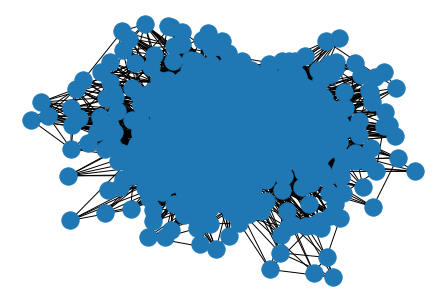

In [142]:
nx.draw(subgraph)

In [164]:
BA_G = nx.barabasi_albert_graph(100, 5)
BA_G.degree

DegreeView({0: 24, 1: 8, 2: 22, 3: 5, 4: 6, 5: 30, 6: 43, 7: 16, 8: 26, 9: 22, 10: 13, 11: 17, 12: 12, 13: 25, 14: 7, 15: 12, 16: 17, 17: 12, 18: 5, 19: 19, 20: 14, 21: 10, 22: 13, 23: 17, 24: 13, 25: 12, 26: 15, 27: 10, 28: 9, 29: 9, 30: 10, 31: 13, 32: 7, 33: 12, 34: 9, 35: 10, 36: 8, 37: 11, 38: 17, 39: 5, 40: 9, 41: 10, 42: 10, 43: 5, 44: 9, 45: 6, 46: 7, 47: 7, 48: 9, 49: 8, 50: 6, 51: 6, 52: 7, 53: 10, 54: 8, 55: 6, 56: 9, 57: 8, 58: 12, 59: 6, 60: 6, 61: 6, 62: 5, 63: 6, 64: 5, 65: 8, 66: 6, 67: 6, 68: 7, 69: 5, 70: 6, 71: 6, 72: 7, 73: 5, 74: 5, 75: 6, 76: 6, 77: 7, 78: 6, 79: 5, 80: 6, 81: 6, 82: 6, 83: 6, 84: 7, 85: 5, 86: 5, 87: 5, 88: 6, 89: 5, 90: 5, 91: 6, 92: 5, 93: 5, 94: 5, 95: 5, 96: 5, 97: 5, 98: 5, 99: 5})